The following script consists of a Python version of Andrew Ng Stanford Course 'Machine Learning' taught on the Coursera Platform
Note: All exercise data and structure are credited to Stanford University 

**Caveat:** Contrary to the modularity presented in Octave scripts and as I'm using Jupyter Notebooks for educational purposes we will implement the functions on the same notebook where we will call them

# Exercise 1 - Loading and Visualizing the Data

In [2]:
# Import numpy libraries to deal with matrixes and vectors
import numpy as np
# Import pandas do read data files
import pandas as pd
# Import matplotlib to plot data
import matplotlib.pyplot as plt

# Import math 
import math 

# Import scipy optimization and io function
from scipy import optimize, io
# Get rotate from scipy image
from scipy.ndimage import rotate

# Maximum precision in Numpy arrays
np.set_printoptions(suppress=True)

# Matplotlib notebook property
%matplotlib inline

In [3]:
# Define input layer Size and Number of labels (outcome space - 1 until 10 (10 mapped as 0))
# These are parameters to use in the already pre-trained neural network below.
input_layer_size = 400
num_labels = 10

In [4]:
# Use scipy Io to load matrix object
ex3_file = io.loadmat('ex3data1.mat')
X = np.array(ex3_file['X'])
y = np.array(ex3_file['y'])

print('# of training examples: {}'.format(len(X)))
m = len(X)

# of training examples: 5000


The data translates some portion of the MNIST dataset, containing vector representations of handrwritten digits. 
The data is unrolled into a 400 dimensional vector with grayscales intensity. By reshaping the data below we are going to be able to see the digits themselves as an image.

**We are going to plot 100 random digits next.**

In [5]:
# Select 100 random indices between 0 and 4999 
index = np.random.choice(X.shape[0], 101, replace=False) 

# Subset Array elements to Plot - using index
sel = X[index]

In [6]:
def displayData(
    images: np.array
) -> None:
    '''
    Plots 10 by 10 grid of hand-written digit images
    
    Args:
        images(np.array): arrays with images to plot.
    
    Returns:
        None
    '''
    
    # Construct figure
    fig=plt.figure(figsize=(10, 10))
    
    columns = 10
    
    rows = 10
    # Loop through each piece of the grid and plot the digit by reshaping the data into a 20 by 20 pixel image
    for i in range(1, sel.shape[0]):
        img = sel[i].reshape(20,20)
        fig.add_subplot(rows, columns, i)
        plt.imshow(rotate(img[::-1],270))
        plt.axis('off')
    plt.show()

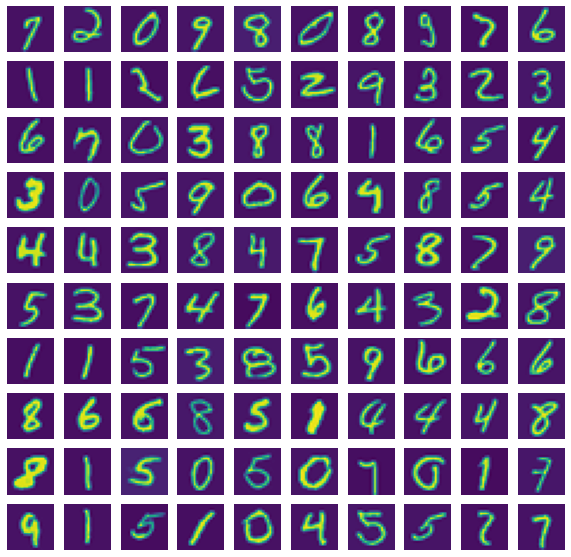

In [7]:
# Display the Grid

displayData(sel)

We want to develop a multi-class classification for the Neutral Network. Notice how the target is not binary 1 vs. 0 but a One vs. All approach. Each output will have the probability of a specific number beloging to a specific class (1-10)
Like Andrew, we will keep the 0 classed map for 10 although in Python this would not be a issue.

# Exercise 2 - Neural Networks

We are now going to fit a pre-trained Neural Network model. The neural network model has pre-trained weights that are going to be applied according to the following schema: 

<img src="assets/NeuralNetwork.JPG">

Our input dimension has 401 nodes (400 columns from the X array + intercept (array of 1's)); <br>
Our hidden layer consists of 25 nodes + intercept; <br>
Out output layer consists of 10 nodes (each one is a probability of the row belonging to each 0-9 digit); <br>

In [8]:
# Loading saved matrices with weights from file

weights = io.loadmat('ex3weights.mat')

# Define parameters for Neural Network model - Sizes of Layers

input_layer_size = 400
hidden_layer_size = 25
num_labels = 10

In [9]:
# Assign theta 1 and theta 2 from weights vector
Theta1 = weights['Theta1']
Theta2 = weights['Theta2']

In [10]:
# Define sigmoid function 
def sigmoid(x: np.array)-> np.array:
    '''
    Outputs the Sigmoid for each element of an array
    
    Args:
        x(np.array): Array with original values
    Returns:
        x(np.array): Resulting sigmoid values of original matrix
    '''
    return(1 / (1 + np.exp(-x)))

In [11]:
# Define predict function

def predict(
    Theta1: np.array, 
    Theta2: np.array, 
    X: np.array
)-> np.array:
    '''
    Outputs the maximum class predicted by the Neural Network
    Returns array of predicted digits per number of observations.
    
    Args:
        Theta1(np.array): First set of thetas to apply 
        to first NN layer.
        Theta2(np.array): Second set of thetas to apply 
        to second NN layer.
        X(np.array): Original matrix with images.
    Returns:
        prediction(np.array): array of integers with predicted digit 
    '''
    m = X.shape[0]

    # Add intercept
    ones_vector = np.ones((len(X),1))
    X_extended = np.hstack((ones_vector,X))
    
    staging_1 = sigmoid(np.dot(X_extended,Theta1.T))
    
    # Add ones to Staging_1 array
    ones_vector = np.ones((len(X),1))
    staging_1 = np.hstack((ones_vector,staging_1))
    
    staging_2 = sigmoid(np.dot(staging_1, Theta2.T))
    
    # We'll use idxmax to get the maximum probability assigned to each row - add One to get the real digit
    prediction = pd.DataFrame(staging_2).idxmax(axis=1)+1
    
    return np.array(prediction)

In [12]:
# Obtain the predictions
pred = predict(Theta1,Theta2,X)

In [13]:
# Check accuracy of Neural Network

print("Accuracy is {:.2%} ".format(sum(np.array([1 if val == True else 0 for val in pred.reshape(len(y),1)==y]))/len(y)))

Accuracy is 97.52% 


Remember how we achieved 91.2% accuracy with a One vs. All Logistic Regression? With NN we have achieved 5 more percentual points, quite an improvement! And we did it just by using a non-linear algorithms - and by using a non-linear set of weights from a pre-trained network.

Now, using the weights that have been pre-trained we can check what the Neural Network is predicting and plot the digit.

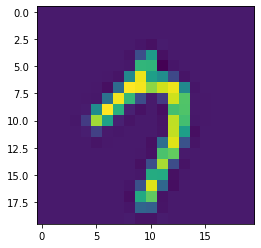

Digit is 7


In [ ]:
aux_break = 1

while aux_break:
    index = np.random.randint(0,len(X))
    img = X[index].reshape(20,20)
    plt.imshow(rotate(img[::-1],270))
    plt.show()
    print('Digit is {}'.format(int(y[index])))
    aux_break = input('Do you want to show another Digit? Write "end" to end loop.')   
    if aux_break == "end":
        break

Using pre-trained weights we could achieve a good performance in predicting digits with a Neural Network. During the next couple of lessons we will train the Neural Networks ourselves and use the tools in our toolbox such as gradient descent and cost functions to achieve that.